### Evaluation metric used are mean absolute error, mean squared error and R2 score

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Importing the train test split function
from sklearn.model_selection import train_test_split
%matplotlib inline
# Importing the dataset
df = pd.read_csv('nyc taxi_trip_duration.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.286463,0.008198,0.002861,0.002371,0.005259,0.027752
passenger_count,0.286463,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022
pickup_longitude,0.008198,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447
pickup_latitude,0.002861,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163
dropoff_longitude,0.002371,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664
dropoff_latitude,0.005259,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283
trip_duration,0.027752,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000


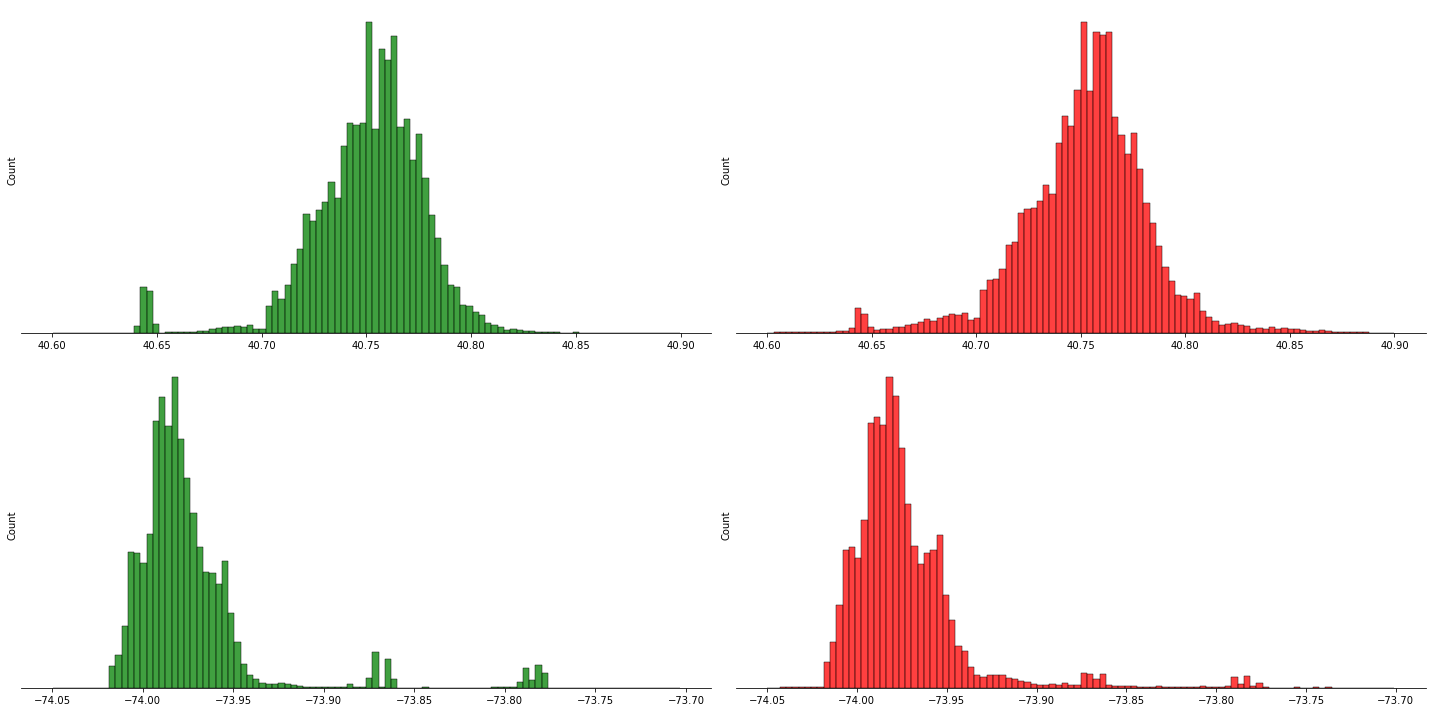

In [5]:
#removing outliers
df_coord = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df_coord = df_coord.loc[(df.dropoff_latitude > 40.6) & (df.dropoff_latitude < 40.9)]
df_coord = df_coord.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df_coord = df_coord.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]

# Plot the distribution plot again with the same values but this time with the bounds in place for coordinates
fig, ax = plt.subplots(2,2,figsize=(20, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.histplot(df_coord['pickup_latitude'].values, label = 'pickup_latitude',color="g",bins = 100, ax=ax[0,0])
sns.histplot(df_coord['dropoff_latitude'].values, label = 'dropoff_latitude',color="r",bins = 100, ax=ax[0,1])
sns.histplot(df_coord['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins = 100, ax=ax[1,0])
sns.histplot(df_coord['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins = 100, ax=ax[1,1])
plt.setp(ax, yticks=[])
plt.tight_layout()

The above plots shows us that most of the rides are centered around the following coordinates:
Latitude: 40 to 41
Longitude: -73 to -74

One anomaly that we see here is that some of the trips that are from some other lat like 32 to 44 are taking a very long time and hence effecting the plot as such. These values are outliers
Also, we see that the two vendors are positive correlated with the pickup and dropoff latitude and longitude as well. This means that they only operate in this region.

In [6]:
import datetime as dt
df['pickup_datetime']=pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime']=pd.to_datetime(df.dropoff_datetime)
df['store_and_fwd_flag']=1*(df.store_and_fwd_flag=='Y')
np.sum(df.isnull())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  729322 non-null  object        
 1   vendor_id           729322 non-null  int64         
 2   pickup_datetime     729322 non-null  datetime64[ns]
 3   dropoff_datetime    729322 non-null  datetime64[ns]
 4   passenger_count     729322 non-null  int64         
 5   pickup_longitude    729322 non-null  float64       
 6   pickup_latitude     729322 non-null  float64       
 7   dropoff_longitude   729322 non-null  float64       
 8   dropoff_latitude    729322 non-null  float64       
 9   store_and_fwd_flag  729322 non-null  int32         
 10  trip_duration       729322 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int32(1), int64(3), object(1)
memory usage: 58.4+ MB


In [117]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848


In [118]:
df['day_of_week']=df['pickup_datetime'].dt.day_of_week

In [119]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2


In [120]:
df['day_of_week'].value_counts()

4    111744
5    110252
3    109344
2    105074
1    101254
6     97682
0     93972
Name: day_of_week, dtype: int64

In [121]:
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [122]:
df['Distance'] =  haversine_distance(df.pickup_latitude, df.pickup_longitude, df.dropoff_latitude, df.dropoff_longitude)

In [123]:
df['speed']=(df['Distance']*3600)/df['trip_duration']

In [124]:
df.groupby('day_of_week', as_index=False)['speed'].mean()

,day_of_week,speed
0,0,15.094891
1,1,13.701390
2,2,13.477628
3,3,13.467004
4,4,13.735346
5,5,15.027216
6,6,16.699029


We can see that taxi drives the fastest on Sunday followed by monday and saturday hence ride time will be the least on Sunday

In [125]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,Distance,speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,0,1.20,10.800000
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,4,4.13,13.516364
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,6,7.25,15.963303
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1,2.36,7.446100
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2,4.33,18.382075


In [126]:
df['hour_of_day']=df['pickup_datetime'].dt.hour

In [127]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,Distance,speed,hour_of_day
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,0,1.20,10.800000,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,4,4.13,13.516364,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,6,7.25,15.963303,17
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1,2.36,7.446100,9
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2,4.33,18.382075,6


In [128]:
dataf=df[['hour_of_day','speed']]
np.percentile(dataf.speed, 25), np.percentile(dataf.speed, 99.9)

(9.124137931034483, 54.14626675010343)

In [129]:
dataf=dataf.loc[(dataf.speed > 9) & (dataf.speed < 55)]

In [130]:
speed_at_hrs=dataf.groupby('hour_of_day', as_index=False)['speed'].mean()

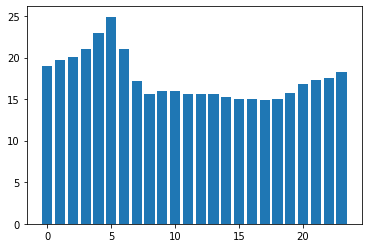

In [131]:
plt.bar(speed_at_hrs.hour_of_day,speed_at_hrs.speed)
plt.show()

Busiest Hours of the day are from 8A.M. to 7P.M.

In [132]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'day_of_week', 'Distance', 'speed', 'hour_of_day'],
      dtype='object')

# Benchmark Model

In [163]:
x=df[['Distance','speed','day_of_week','hour_of_day']]
y=df['trip_duration']
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=42)
train_x=train_x.groupby(['day_of_week','hour_of_day'], as_index=False)['speed'].mean()

In [164]:
train_x.head()

,day_of_week,hour_of_day,speed
0,0,0,22.423400
1,0,1,21.780779
2,0,2,22.538981
3,0,3,22.845519
4,0,4,24.983952


In [165]:
df_merged = pd.merge(test_x, train_x, on=['day_of_week','hour_of_day'], how='inner')
ypred=df_merged['Distance']*df_merged['speed_y']

In [166]:
from sklearn.metrics import mean_absolute_error as MAE
simple_mean_error = MAE(y_pred , test_y)
simple_mean_error

866.1046926953004

In [168]:
mse=mean_squared_error(test_y, y_pred)
mse

43743061.17203578

In [186]:
error=[simple_mean_error]

# Decision Tree 

In [171]:
#seperating independent and dependent variables
x = df.drop(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'Distance','trip_duration'], axis=1)
y = df['trip_duration']
x.shape, y.shape

((729322, 9), (729322,))

In [172]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=56)

In [173]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(train_x, train_y)

DecisionTreeRegressor()

In [187]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(test_x)
r2=r2_score(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)
print("r2 score: %.2f" % r2)
print("MSE: %.2f" % mse)
error.append(mse)

r2 score: 1.00
MSE: 6459.97


In [144]:
from io import StringIO
from sklearn.tree import export_graphviz
feat_importance = regressor.tree_.compute_feature_importances(normalize=False)
print("feature importance = " + str(feat_importance))


feature importance = [9.59118003e+05 7.33641762e+06 7.60865439e+05 1.37720677e+06
 4.51997733e+01 8.81321330e+04 5.61862853e+06 1.54468434e+05]


Here we can infer that day of week and pick up location plays a crucial role in the prediction of time taken by cab using decision tree regressor model

In [143]:
x.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'day_of_week', 'speed',
       'hour_of_day'],
      dtype='object')

In [158]:
#converting time into categorical data of 5 minutes to reduce processing time
df['time_minutes']=df['trip_duration']//300

#  KNN Classifier

In [159]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score
#seperating independent and dependent variables
x = df[['day_of_week','Distance','hour_of_day']]
y = df['time_minutes']
x.shape, y.shape

((729322, 3), (729322,))

In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [161]:
x = pd.DataFrame(x_scaled, columns = x.columns)
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,train_size=0.8)

In [74]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
# Creating instance of KNN
reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
mse=mean_squared_error(test_predict, test_y)
print("MSE: %.2f" % mse)

MSE: 379.58


Text(0.5, 1.0, 'Elbow Curve for test')

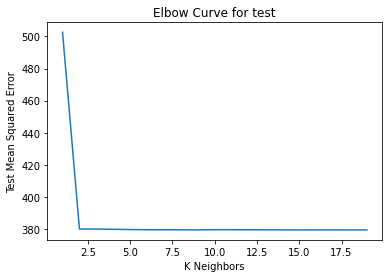

In [75]:
k = range(1,20)
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mean_squared_error(tmp,test_y)
        test_mse.append(tmp)
    return test_mse
test = Elbow(k)
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

We can observe that the best value for K is 2 as depicted by the elbow curve

In [162]:
reg = KNN(n_neighbors = 2)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
mse=mean_squared_error(test_predict, test_y)
print("MSE: %.2f" % mse)

MSE: 389.76


In [188]:
error.append(389.76)

In [191]:
error

[866.1046926953004, 6459.973886813149, 389.76]

In [189]:
model=['benchmark','DecisionTree','KNN']

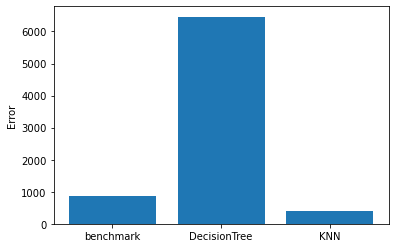

In [194]:
plt.bar(model,error)
plt.ylabel('Error')
plt.show()

Benchmark model was the worse in terms of mean squared error .Since it was a really high value which made other scores negligible so we used mean absolute error. Out of all KNN was the slowest.
Although mean squared error of Decision tree turns out to be greater it had a better R2 score as compared to KNN

In [6]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [10]:
var=df.groupby('passenger_count', as_index=False)['trip_duration'].mean()

In [12]:
var.to_csv("average.csv")

In [16]:
c=df.describe()

In [17]:
c.to

pandas.core.frame.DataFrame

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB
